In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [93]:
base_path = "C:/Users/91910/OneDrive/Desktop/ML Learning"
df_file_path = os.path.join(base_path, "Datasets", "height-weight.csv")

df = pd.read_csv(df_file_path, encoding="utf-8")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

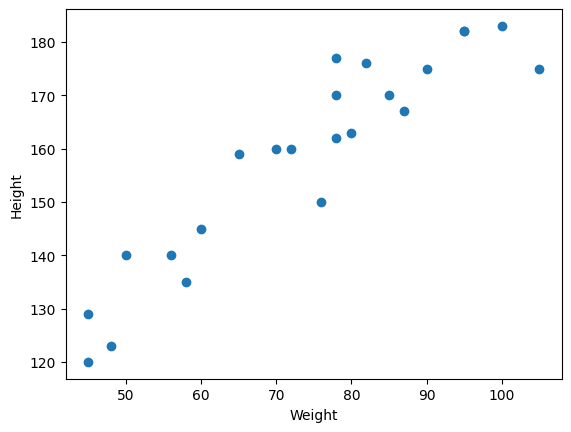

In [94]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

<Axes: >

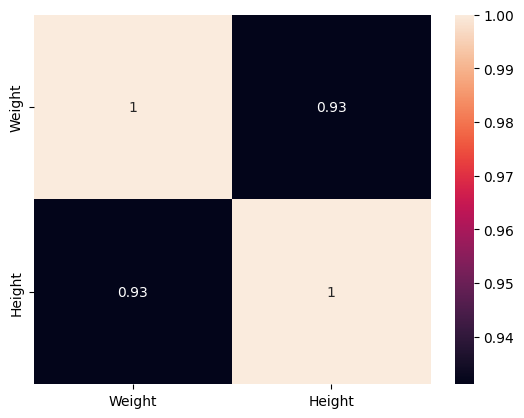

In [95]:
sns.heatmap(df.corr(),annot = True)

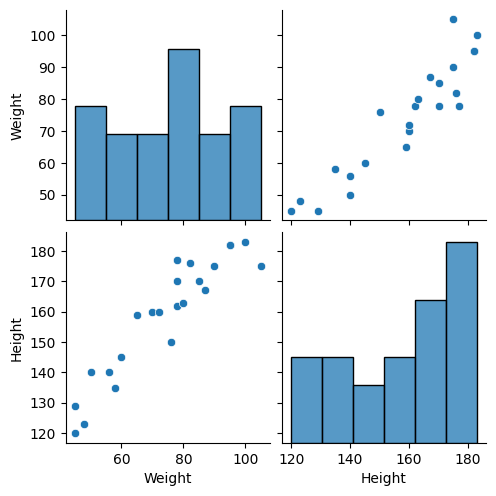

In [96]:
sns.pairplot(df)

In [97]:
X, y = df[['Weight']], df['Height']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.25,
                                                       random_state=42)


In [99]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [101]:
print("slope of best fit line = ", lr.coef_)

slope of best fit line =  [17.2982057]


In [ ]:

("y-intercept value of best fit line = ", lr.intercept_)

y-intercept value of best fit line =  156.47058823529412


Text(0, 0.5, 'Height')

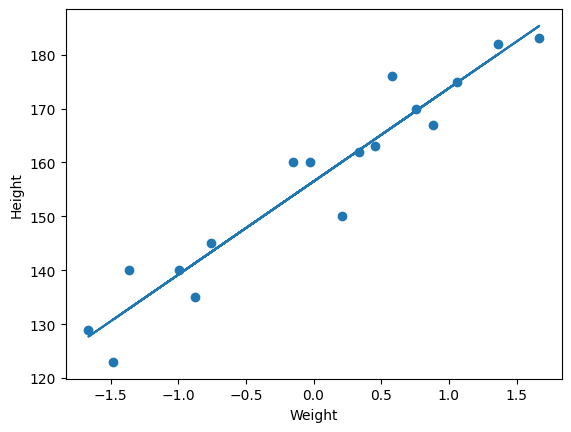

In [103]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train))
plt.xlabel('Weight')
plt.ylabel('Height')

In [104]:
y_pred = lr.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [105]:
#performance metrics
print("R2 score of the model = ", lr.score(X_test, y_test))
print("mean absolute error = ", mean_absolute_error(y_test, y_pred))
print("mean squared error = ", mean_squared_error(y_test, y_pred))

R2 score of the model =  0.7360826717981276
mean absolute error =  9.66512588679501
mean squared error =  114.84069295228699


Linear Regression using OLS

In [109]:
import statsmodels.api as sm

In [112]:
lr_ols = sm.OLS(y_train, X_train).fit()
ols_y_pred = lr_ols.predict(X_test)
print(ols_y_pred)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [114]:
print(lr_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 26 Oct 2025   Prob (F-statistic):                       0.664
Time:                        15:58:21   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\91910\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  k, _ = kurtosistest(a, axis)


In [115]:
#new prediction
lr.predict(scaler.transform([[72]]))

c:\Users\91910\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])